# Capstone Project
### DATA 606, Spring 2022, Dr. Chaojie Wang

#### Description: 
This notebook represents data cleansing and Exploratory Data Analysis.  This explores BikeShare trip data for three cities to get an understanding of the data through summarizing and charting.  

#### Dataset Sources:
<ul><li>New York City: <a href='https://ride.citibikenyc.com/system-data'>https://ride.citibikenyc.com/system-data</a> </li>
    <li>Chicago: <a href='https://ride.divvybikes.com/system-data'>https://ride.divvybikes.com/system-data</a> </li>
    <li>San Francisco: <a href='https://www.lyft.com/bikes/bay-wheels/system-data'>https://www.lyft.com/bikes/bay-wheels/system-data</a> </li>
</ul>

## Function Definitions & Setup
This section deals with imports and function definitions

In [1]:
import pandas as pd
pd.__version__

'1.3.4'

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

In [4]:
import glob

In [5]:
import os
from os.path import join, isdir
from os import mkdir, path

In [6]:
import datetime

In [7]:
# Import my helper py file to help with importing the data
import dfimporthelpers as imp

### Input Parameters
#### Set input parameter values that will be used for the analysis


In [8]:
# Used for chart labels
p_city_name = 'Chicago'

In [9]:
# Source directory of csv data files to analyze
p_src_directory = 'ChicagoData'

In [10]:
# Column names to be used when importing the data since some files use different names
# even though the columns are the same.  Set to None to use the columns names from the header in 
# each file.
p_column_names = None
#p_column_names = ['ride_id','started_at','ended_at','bikeid','tripduration','start_station_id',
#                'start_station_name','end_station_id','end_station_name','usertype','gender','birthyear']

<br><br>

# Load and Clean Bike Share data for each city

In [11]:
dir_path = '/Users/DF/Library/CloudStorage/OneDrive-Personal/Documents/' + \
           'Grad School-David’s MacBook Pro/Spring 2022 - Capstone/JupyterNB/'

## Load Chicago data
#### First load the newer data, which uses a different field layout than the older data. This was determined through initial cleaning and then streamlined in this consolidated notebook.

In [12]:
# Load Chicago data that uses the latest field layout
full_path = dir_path + 'ChicagoData'
df_chicago = imp.load_csvs_to_df(src_dir=full_path, col_names=None)

In [13]:
df_chicago.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


#### Now Load the older data

In [14]:
# Load the older data that uses a different layout
full_path = dir_path + 'ChicagoData/Older'

column_names = ['ride_id','started_at','ended_at','bikeid','tripduration','start_station_id',
                'start_station_name','end_station_id','end_station_name','member_casual','gender','birthyear']

df_temp = imp.load_csvs_to_df(src_dir=full_path, col_names=column_names)

In [15]:
df_temp.head(5)

,ride_id,started_at,ended_at,bikeid,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [16]:
# View data
df_chicago.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [17]:
df_temp.dtypes

ride_id                 int64
started_at             object
ended_at               object
bikeid                  int64
tripduration           object
start_station_id        int64
start_station_name     object
end_station_id          int64
end_station_name       object
member_casual          object
gender                 object
birthyear             float64
dtype: object

#### Combine the two Chicago dataframes then we'll update field types further

#### Get row counts of each before we combine them

In [18]:
df_temp.shape

(3818004, 12)

In [19]:
df_chicago.shape

(9240516, 13)

In [20]:
df_chicago = pd.concat([df_temp, df_chicago])

In [21]:
# How many rows and columns
print('rows:', df_chicago.shape[0])
print('columns:', df_chicago.shape[1])

rows: 13058520
columns: 17


#### Add a field to indicate this is from Chicago.  This will be useful when we combine all the cities together.

In [22]:
df_chicago['city'] = 'Chicago'

In [23]:
# View many
df_chicago.dtypes

ride_id                object
started_at             object
ended_at               object
bikeid                float64
tripduration           object
start_station_id       object
start_station_name     object
end_station_id         object
end_station_name       object
member_casual          object
gender                 object
birthyear             float64
rideable_type          object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
city                   object
dtype: object

## Load San Francisco data
#### First load the newer data, which uses a different field layout than the older data. This was determined through initial cleaning and then streamlined in this consolidated notebook.

In [24]:
# Load Chicago data that uses the latest field layout
full_path = dir_path + 'SanFranciscoData'
df_sanfrancisco = imp.load_csvs_to_df(src_dir=full_path, col_names=None)

In [25]:
df_sanfrancisco.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

#### Now Load the older data

In [26]:
# Load the older data that uses a different layout
full_path = dir_path + 'SanFranciscoData/Older'

column_names = ['duration','started_at','ended_at','start_station_id',
                'start_station_name','start_lat','start_lng','end_station_id','end_station_name',
                'end_lat','end_lng','bike_id','member_casual','rental_access_method']

df_temp = imp.load_csvs_to_df(src_dir=full_path, col_names=column_names)

In [27]:
df_temp.dtypes

duration                 object
started_at               object
ended_at                 object
start_station_id         object
start_station_name       object
start_lat               float64
start_lng               float64
end_station_id           object
end_station_name         object
end_lat                 float64
end_lng                 float64
bike_id                  object
member_casual            object
rental_access_method     object
dtype: object

In [28]:
# View data
df_sanfrancisco.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

#### Combine the two dataframes then we'll update field types further

#### Get row counts of each before we combine them

In [29]:
df_temp.shape

(3411990, 14)

In [30]:
df_sanfrancisco.shape

(3427009, 13)

In [31]:
df_sanfrancisco = pd.concat([df_temp, df_sanfrancisco])

In [32]:
# How many rows and columns
print('rows:', df_sanfrancisco.shape[0])
print('columns:', df_sanfrancisco.shape[1])

rows: 6838999
columns: 16


#### Add a field to indicate the city.  This will be useful when we combine all the cities together.

In [33]:
df_sanfrancisco['city'] = 'San Francisco'

In [34]:
df_sanfrancisco.dtypes

duration                 object
started_at               object
ended_at                 object
start_station_id         object
start_station_name       object
start_lat               float64
start_lng               float64
end_station_id           object
end_station_name         object
end_lat                 float64
end_lng                 float64
bike_id                  object
member_casual            object
rental_access_method     object
ride_id                  object
rideable_type            object
city                     object
dtype: object

In [35]:
# View the combined df
df_sanfrancisco.head()

,duration,started_at,ended_at,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,member_casual,rental_access_method,ride_id,rideable_type,city
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN,NaN,San Francisco
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294,Pierce Ave at Market St,37.327581,-121.884559,443,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN,NaN,San Francisco
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370,Jones St at Post St,37.787327,-122.413278,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN,NaN,San Francisco
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109,17th St at Valencia St,37.763316,-122.421904,460,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN,NaN,San Francisco
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95,Sanchez St at 15th St,37.766219,-122.431060,127,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN,NaN,San Francisco


## Load New York City data
#### First load the newer data, which uses a different field layout than the older data. This was determined through initial cleaning and then streamlined in this consolidated notebook.

In [36]:
# Load data that uses the latest field layout
full_path = dir_path + 'NYCData'
df_nyc = imp.load_csvs_to_df(src_dir=full_path, col_names=None)

In [37]:
df_nyc.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E12103A91226099A,docked_bike,2021-05-06 17:25:01,2021-05-06 17:45:25,Broadway & W 60 St,6948.11,1 Ave & E 78 St,7020.09,40.769155,-73.981918,40.771404,-73.953517,member
1,26A3DC47FE0EA3A3,docked_bike,2021-05-13 12:48:08,2021-05-13 13:07:37,Broadway & W 25 St,6173.08,E 2 St & Avenue B,5515.02,40.742868,-73.989186,40.722174,-73.983688,member
2,A99F2E1D627B088F,docked_bike,2021-05-16 08:30:13,2021-05-16 08:45:47,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member
3,43E79A45997B7390,docked_bike,2021-05-01 08:38:14,2021-05-01 08:54:27,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member
4,8B3CC649F4F58816,docked_bike,2021-05-09 08:12:31,2021-05-09 08:27:05,46 Ave & 5 St,6286.02,34th Ave & Vernon Blvd,6873.01,40.747310,-73.954510,40.765354,-73.939863,member


#### Now Load the older data

In [38]:
# Load the older data that uses a different layout
full_path = dir_path + 'NYCData/Older'

column_names = ['duration','started_at','ended_at','start_station_id',
                'start_station_name','start_lat','start_lng','end_station_id','end_station_name',
                'end_lat','end_lng','bike_id','member_casual','birthyear','gender']

df_temp = imp.load_csvs_to_df(src_dir=full_path, col_names=column_names)

In [39]:
df_temp.head(5)

,duration,started_at,ended_at,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,bike_id,member_casual,birthyear,gender
0,1062,2020-06-01 00:00:03.3720,2020-06-01 00:17:46.2080,3419.0,Douglass St & 4 Ave,40.679279,-73.981540,3419.0,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2
1,3810,2020-06-01 00:00:03.5530,2020-06-01 01:03:33.9360,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336.0,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0
2,1017,2020-06-01 00:00:09.6140,2020-06-01 00:17:06.8330,389.0,Broadway & Berry St,40.710446,-73.965251,3562.0,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2
3,226,2020-06-01 00:00:12.1780,2020-06-01 00:03:58.8640,3255.0,8 Ave & W 31 St,40.750585,-73.994685,505.0,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0
4,1437,2020-06-01 00:00:21.2550,2020-06-01 00:24:18.9650,367.0,E 53 St & Lexington Ave,40.758281,-73.970694,497.0,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2


In [40]:
# View data
df_nyc.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [41]:
df_temp.dtypes

duration                int64
started_at             object
ended_at               object
start_station_id      float64
start_station_name     object
start_lat             float64
start_lng             float64
end_station_id        float64
end_station_name       object
end_lat               float64
end_lng               float64
bike_id                 int64
member_casual          object
birthyear               int64
gender                  int64
dtype: object

#### Combine the two dataframes then we'll update field types further

#### Get row counts of each before we combine them

In [42]:
df_temp.shape

(41153900, 15)

In [43]:
df_nyc.shape

(27616822, 13)

In [44]:
df_nyc = pd.concat([df_temp, df_nyc])

In [45]:
# How many rows and columns
print('rows:', df_nyc.shape[0])
print('columns:', df_nyc.shape[1])

rows: 68770722
columns: 17


#### Add a field to indicate this is from Chicago.  This will be useful when we combine all the cities together.

In [46]:
df_nyc['city'] = 'NYC'

In [47]:
# View many
df_nyc.dtypes

duration              float64
started_at             object
ended_at               object
start_station_id       object
start_station_name     object
start_lat             float64
start_lng             float64
end_station_id         object
end_station_name       object
end_lat               float64
end_lng               float64
bike_id               float64
member_casual          object
birthyear             float64
gender                float64
ride_id                object
rideable_type          object
city                   object
dtype: object

### Finally, combine all City Dataframes into One

In [48]:
df_all = pd.concat([df_chicago,df_sanfrancisco,df_nyc])

In [49]:
# How many rows and columns do we have
df_all.shape

(88668241, 21)

<br>

## Clean and prepare the data

#### Look at the data field types

In [50]:
df_all.dtypes

ride_id                  object
started_at               object
ended_at                 object
bikeid                  float64
tripduration             object
start_station_id         object
start_station_name       object
end_station_id           object
end_station_name         object
member_casual            object
gender                   object
birthyear               float64
rideable_type            object
start_lat               float64
start_lng               float64
end_lat                 float64
end_lng                 float64
city                     object
duration                 object
bike_id                  object
rental_access_method     object
dtype: object

#### Remove columns we don't current need

In [ ]:
df_all.drop(['rental_access_method','duration','bike_id','bikeid','tripduration'], axis=1, inplace=True)

In [ ]:
df_all.head()

In [ ]:
# Convert date/times
df_all['started_at'] = pd.to_datetime(df_all['started_at'])
df_all['ended_at']   = pd.to_datetime(df_all['ended_at'])

#### Check for null values

In [ ]:
df_all.isnull().sum()

#### Based on the above, we have nulls in all fields except started_at, ended_at, and member_casual

In [ ]:
# fill null numeric columns with the value 0
df_all[['end_lat','end_lng','start_lat','start_lng','birthyear']] = \
    df_all[['end_lat','end_lng','start_lat','start_lng','birthyear']].fillna(value=0)

In [ ]:
# fill null string columns with the ''
df_all[['start_station_name','start_station_id','end_station_name','end_station_id',
        'ride_id','gender','rideable_type']] = \
     df_all[['start_station_name','start_station_id','end_station_name','end_station_id',
             'ride_id','gender','rideable_type']].fillna(value='')

In [ ]:
# Recheck to be sure we have addressed the nulls
df_all.isnull().sum()

#### Let's add separate columns for Month#, Year, Hour for further analysis

In [ ]:
df_all['year']       = pd.DatetimeIndex(df_all['started_at']).year
df_all['month']      = pd.DatetimeIndex(df_all['started_at']).month
df_all['year-month'] = df_all['started_at'].dt.strftime('%Y-%m')
df_all['hour_of_day'] = pd.DatetimeIndex(df_all['started_at']).hour

<br />

### Save the final combined to a csv so we don't have to repeat the time-consuming above steps when developing and testing

<br /> 

### Start Here to use the saved copy of the above

<br /><br />

# Summarize Data

### Summarize by city

In [ ]:
# Group the results by year
df_grouped = df_all.groupby(['city']).agg({'ride_id': 'count'}).copy().reset_index()

# Rename to be "count"
df_grouped.rename(columns={'ride_id':'#trips'}, inplace=True)

df_grouped.sort_values('#trips',inplace=True)

In [ ]:
df_grouped.head()

In [ ]:
heading = 'Total Trips by City (January 2019 - January 2022)'

plt.figure()
ax = df_grouped.plot.barh(stacked=False, figsize=(10,6), x='city', title=heading)
ax.set_xlabel('Number of Trips')
    
# Display to screen
plt.show()

### Summarize by year and city

In [ ]:
# Group the results by year
df_grouped = df_all.groupby(['year','city']).agg({'ride_id': 'count'}).copy().reset_index()

# Rename to be "count"
df_grouped.rename(columns={'ride_id':'#trips'}, inplace=True)

In [ ]:
df_grouped.head(12)

In [ ]:
# Pivot to prepare to plot the years and cities
df_pivot = df_grouped.pivot(index='year', columns='city', values='#trips')

In [ ]:
heading = 'Total Trips by Year (thru January 2022)'

plt.figure()
ax = df_pivot.plot.bar(stacked=True, figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')
    
# Display to screen
plt.show()

### Summarize by month to see the trips per month over time

In [ ]:
# Group the results by month
df_grouped = df_all.groupby(['year-month', 'city']).agg({'ride_id': 'count'}).copy().reset_index()

# Rename to be "count"
df_grouped.rename(columns={'ride_id':'#trips'}, inplace=True)

In [ ]:
df_grouped[df_grouped['city'] == 'NYC'].head(100)

In [ ]:
# Pivot to prepare to plot the years and cities
df_pivot = df_grouped.pivot(index='year-month', columns='city', values='#trips')

In [ ]:
heading = 'Total Trips by Month'

plt.figure()
ax = df_pivot.plot.line(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')
    
# Display to screen
plt.show()

### Let's now group by start station
#### We'll get the count and one lat/long per start station to be able to plot on a map

In [ ]:
grp = df_all.groupby(['start_station_name'])

df_bystation = grp.agg({'ride_id': 'count'}).copy().reset_index()

# Rename to be "count"
df_bystation.rename(columns={'ride_id':'#trips'}, inplace=True)

In [ ]:
df_bystation.head(10)

#### How many stations are there?

In [ ]:
df_bystation.shape

#### What are the top stations?

In [ ]:
df_bystation.nlargest(20,'#trips')

### Summarize by Rideable Type

In [ ]:
df_grouped = df_all.groupby(['rideable_type','city']).agg({'ride_id': 'count'}).copy().reset_index()

df_grouped.rename(columns={'ride_id':'#trips'}, inplace=True)

In [ ]:
df_grouped.head(100)

In [ ]:
# Pivot to prepare to plot the years and cities
df_pivot = df_grouped.pivot(index='rideable_type', columns='city', values='#trips')

In [ ]:
heading = 'Total Trips by Bike Type'

plt.figure()
ax = df_pivot.plot.bar(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')
    
# Display to screen
plt.show()

### Summarize by Member Type

#### First map older designations to the latest for consistency

In [ ]:
df_all.loc[df_all['member_casual'] == 'Customer', 'member_casual'] = 'casual'
df_all.loc[df_all['member_casual'] == 'Subscriber', 'member_casual'] = 'member'
df_all.loc[df_all['member_casual'] == 'Yes', 'member_casual'] = 'member'
df_all.loc[df_all['member_casual'] == 'No', 'member_casual'] = 'casual'

In [ ]:
df_grouped = df_all.groupby(['city','member_casual']).agg({'ride_id': 'count'}).copy().reset_index()

df_grouped.rename(columns={'ride_id':'#trips'}, inplace=True)

In [ ]:
df_grouped.head()

In [ ]:
# Pivot to prepare to plot the years and cities
df_pivot = df_grouped.pivot(index='city', columns='member_casual', values='#trips')

In [ ]:
df_pivot.head()

In [ ]:
heading = 'Total Trips by Member Type'

plt.figure()
ax = df_pivot.plot.bar(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')

plt.show()

### Summarize by Duration

#### Create calculated field with durations in minutes

In [ ]:
df_all['duration_minutes'] = df_all['ended_at'] - df_all['started_at']
df_all['duration_minutes'] = df_all['duration_minutes'].dt.total_seconds() / 60

In [ ]:
df_all.dtypes

### To remove erroneous durations, restrict to only those between 1 and 360 minutes

In [ ]:
df_durations = df_all[(df_all['duration_minutes'] >= 1) & \
                      (df_all['duration_minutes'] < 120)]

In [ ]:
df_durations.hist(bins=10, column='duration_minutes', by='city')

In [79]:
df_grouped = df_durations.groupby(['city']).agg({'ride_id': 'count', 'duration_minutes': 'mean'}).copy().reset_index()

df_grouped.rename(columns={'ride_id':'#trips'}, inplace=True)

In [80]:
df_grouped.head()

,city,member_casual,#trips
0,Chicago,casual,4794737
1,Chicago,member,8263783
2,NYC,casual,15787161
3,NYC,member,52983561
4,San Francisco,casual,3143813


In [81]:
# Pivot to prepare to plot the years and cities
df_pivot = df_grouped.pivot(index='city', columns='member_casual', values='#trips')

In [82]:
df_pivot.head()

member_casual,casual,member
city,,
Chicago,4794737,8263783
NYC,15787161,52983561
San Francisco,3143813,3602029


<Figure size 432x288 with 0 Axes>

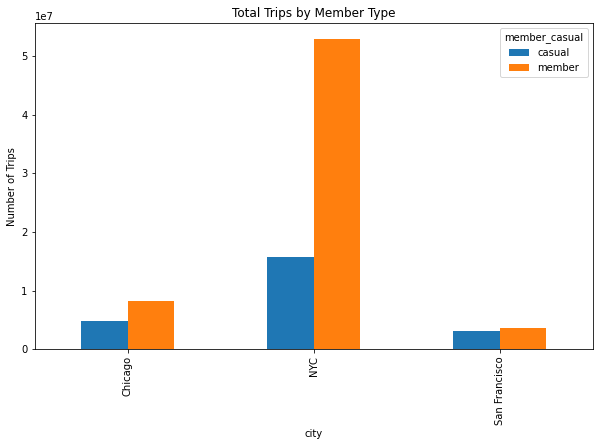

In [83]:
heading = 'Total Trips by Member Type'

plt.figure()
ax = df_pivot.plot.bar(stacked=False, figsize=(10,6), title=heading)
ax.set_ylabel('Number of Trips')

plt.show()